![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
$$\Large \textbf{ Hypothesis Test 1: }\text{ t-test }$$

---
###  **Test Base:** Mean-Based
###  **Number of Samples:** One Sample
###  **Test Distribution:**  $X \sim T_{df}$ (Student's t Distribution)
---

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

##  **Method 1: Using cumulative probability distribution (`cdf`) method**

### **Syntax:**  `scipy.stats.`distribution`.cdf(x, df, loc= popmean, scale= sample_std)`

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

##  **🔖 $\color{blue}{\textbf{Lab Work 1: }}$Computing Test Statistic and $p$ Value for a $\color{purple}{\text{left-tailed}}$ hypothesis test**


<details>
  <summary><b> Show the problem </b></summary>

Jeffrey, as an eight-year old, <b>established a mean time of 16.43 seconds </b> for swimming the 25-yard freestyle, with a <b> standard deviation of 0.8 seconds. </b>  His dad, Frank, thought that Jeffrey could swim the 25-yard freestyle faster using goggles. Frank bought Jeffrey a new pair of expensive goggles and timed Jeffrey for <b> 15 25-yard freestyle swims.</b> For the 15 swims, Jeffrey's <b> mean time was 16 seconds. Frank thought that the goggles helped Jeffrey to swim faster than the 16.43 seconds. </b> Conduct a hypothesis test using a preset α = 0.05. Assume that the swim times for the 25-yard freestyle are normal.

</details>



### **1. Set up Hypotheses**

Look for phrases in the problem to set up the null and alternative hypothesis

"..**mean time**.." tells us that this hypothesis test is a single population mean test
* look for words like equal, greater, not equal, etc...

"..**established a mean time of 16.43 seconds**.." tells us that

$H_0$: **Null hypothesis** The mean swim time is $\mu = 16.43$ seconds

"..**The goggles helped Jeffrey to swim <font color="red">faster than the 16.43 seconds</font>**.."

$H_a$: **Alternative hypothesis** <font color="red">$\mu \lt 16.43$</font> (note that "faster" is a shorter time)

Since the $H_a$ contains less, this is a left-tailed hypothesis test

### **2. Determine Distributions and Parameters**

---



"..**with a standard deviation of 0.8 seconds.** tells us that we know the population standard deviation, so we will use a normal distribution as the underlying hypothesis testing distribution.

**Random variable:** $\overline{X}$ = the mean time to swim the 25-yard freestyle

**Distribution:** $\overline{X} \sim N\left(\mu, \frac{\sigma}{\sqrt{n}}\right)$

Since $\mu = 16.43$ (this is from $H_0$ and not the data) $\sigma=0.8$ and sample size $n = 15$

**Distribution:** $\overline{X} \sim N\left(16.43, \frac{0.8}{\sqrt{15}}\right)$

### **3. Compute test statistics (t or z)(traditional method) - left tail**

In [8]:
import numpy as np
import scipy.stats as stats

# Build the distribution model
mu = 16.43      # population mean, null hypothesis
sigma = 0.8     # population std
n = 15          # sample size
std_sample_mean = sigma / np.sqrt(n)
print(f"Population mean = {mu} seconds\nPopulation STD = {sigma} seconds\nSample mean STD = {std_sample_mean} seconds\nSample size = {n}")

# Value of random variable from the sample
x_bar = 16 # sample mean
# z_score for x_bar in order to look up the table for probability
z_score = (x_bar - mu) / std_sample_mean
print(f"The z_score for the sample mean random variable = {z_score:.3f}")

# z_score for the left tailed test with alpha = 0.05
alpha = 0.05
percentile = alpha # cdf is always the probability from -infinity to the value of the random variable
# What is the value of the random variable corresponding to the alpha (statistically significant level)
# critical value
z_alpha = stats.norm.ppf(percentile)
print(f"The z_alpha (critical value) for 0.05 left-tailed test is: {z_alpha:.3f}")

Population mean = 16.43 seconds
Population STD = 0.8 seconds
Sample mean STD = 0.2065591117977289 seconds
Sample size = 15
The z_score for the sample mean random variable = -2.082
The z_alpha (critical value) for 0.05 left-tailed test is: -1.645


### **4. Compute the $p$-value $ = P( \overline{x} < 16)$**

In [9]:
import numpy as np
import scipy.stats as stats

# Build the distribution model
mu = 16.43      # population mean, null hypothesis
sigma = 0.8     # population std
n = 15          # sample size
std_sample_mean = sigma / np.sqrt(n)
print(f"Population mean = {mu} seconds\nPopulation STD = {sigma} seconds\nSample mean STD = {std_sample_mean} seconds\nSample size = {n}")

# Value of random variable from the sample
x_bar = 16 # sample mean

alpha = 0.05

p_value = stats.norm.cdf(
    x_bar, # value of the random variable sample
    loc=mu,
    scale=std_sample_mean
)
print(f"The p-value for the significance level 0.05 with left-tailed test is {p_value}")

Population mean = 16.43 seconds
Population STD = 0.8 seconds
Sample mean STD = 0.2065591117977289 seconds
Sample size = 15
The p-value for the significance level 0.05 with left-tailed test is 0.018683635713606015


### **5:  Make a Decision about $H_0$**



Since the p value is $0.0186836 \lt \alpha = 0.05$, we reject the null hypothesis $H_0$

### **6: Conclusion about the hypothesis test**

Because a 1.87% chance is very small, the mean time of 16 seconds or less is unlikely to have happened randomly. So it is statistically significant. This only tells us that we can reject the null hypothesis, but it does not tell us that we should accept the alternative hypothesis.

The sample data supports the original claim that the goggles helped Jeffrey swim faster at the 0.05 significance level

### **7: Write about any possible sources of error or other factors that could affect the results of our hypothesis test.**

- The type of goggles might make a difference
- Did Jeffrey swim first without the goggles and then with the goggles? (for example 15 without and then 15 with)
- Jeffrey could have improved during the sampling process
- What kind of timer did they use? Was it the same person timing for all trials? Was the timing done manually or automatically?

### **8. Graph the $p$-value, the <b> area on the left </b> of $\overline{x} = 16$.**
>> * #### **Hint 1:** If the inputs below you enter agree with the parameter variables used in creating the plot, you should see a plot with arrows pointing to the critical values at the statistically significant level $\alpha$ and test statistic, respectively.

>> * #### **Hint 2:** Use as many decimal places as possible.

>> * #### **Hint 3:** If you do not enter the correct p values or type of the hypothesis test, the App will output a message and exit.


---
> #### **8a. Interactive plot with `plotly` library**

In [10]:

#@title Enter the values for the hypothesis test from your computation above
# @markdown Enter the sample mean $\bar{x}$
x_bar =  16 #@param {type:"number"}
# @markdown Enter the sample size $n$
n = 15 #@param {type:"integer"}
# @markdown Enter the population mean $\mu$ (The $H_0$ hypothesis)
mu =  16.43 #@param {type:"number"}
# @markdown Enter the <font color = "red">population </font> standard deviaton
population_std =  0.8 #@param {type:"number"}
# @markdown Enter the <font color = "red"> p value </font> from your hypothesis test with six decimal places)
p_value = 0.018683635713606015 #@param {type:"number"}
#@markdown Choose the probability distribution you used for this hypothesis testing
p_distribution = "Normal Distribution" # @param ["Normal Distribution", "Student's t Distribution", "Chi-Square Distribution","f Distribution", "None"]
#@markdown Choose the type of this hypothesis testing
Test_types = "Left-tailed hypothesis test" # @param ["Left-tailed hypothesis test", "Right-tailed hypothesis test", "Two-tailed hypothesis test","None"]
# @markdown Enter the statistically significant level
alpha = 0.05 #@param {type:"number"}


import numpy as np
import plotly.graph_objects as go
import scipy.stats  as stats
import sys # at top of file

std = population_std /np.sqrt(n)  # sample maen std

#Compute the probability
"""
p_value = 1 - stats.norm.cdf(x= x_bar, loc = mu, scale= std
                      )
"""

if ((p_value < 0.0186) or (p_value > 0.0187)):
    print("The p values was not accurate.")
    sys.exit()
elif (p_distribution != "Normal Distribution"):
    print("Reread the problem and chek the sample sizes to see what probability distribution you need to use.")
    sys.exit()
elif Test_types != "Left-tailed hypothesis test":
    print("The type of hypothesis does not agree with your hypothesis.")
    sys.exit()

fig = go.Figure()

x_lower = mu - 5 * std
x_upper = mu + 5 * std

#add the density curve ppf to the plot
x_pdf = np.arange(x_lower, x_upper,0.01) # array of input values for pdf
fig.add_trace(go.Scatter(
                          x = x_pdf,
                          y = stats.norm.pdf(x_pdf, loc = mu, scale = std),
                          mode = "lines", line_color ="black"
                      ))

# inputs for creating shade under the left tail
#x_left = np.arange(x_min, x_left, 0.01)
#yy_left = stats.norm.pdf(xx_left, loc = mu, scale = std)
xx_left = np.trim_zeros(x_pdf *(x_pdf <= x_bar))
fig.add_trace(go.Scatter(
                          x = xx_left,
                          y = stats.norm.pdf(xx_left, loc = mu, scale = std),
                          line_color = "black", fill = "tozeroy", fillcolor = 'rgba(117, 95, 231, 0.5)'
                      ))

# compute the critical value at significance level of alpha

x_ct = stats.norm.ppf(alpha, loc = mu, scale = std)

y_ct = stats.norm.pdf(x_ct, loc = mu, scale = std)


# add the critical point
fig.add_trace(go.Scatter(
                x = [x_ct, x_ct], # option is to use a variable
                y = [0, stats.norm.pdf(x_ct, mu, std)], # up to the maximum of pdf
                mode = "lines",
                #name = f"ci upper bound = {ci_upper: .2f}",
                line = dict(color = 'red', dash = "dot", width = 4)
                ))

fig.update_layout( height = 600, width = 900,
                  title = "One Population of Mean-Based Hypothesis Testing with Normal Distribution",
                  title_x = 0.5,
                  xaxis = dict( title = r"$\bar{X}$",
                               zeroline=True,  linewidth=1, linecolor='black', mirror=True,),
                  yaxis = dict (title = "Probability Density Function",
                                zeroline=True,  linewidth=1, linecolor='black', mirror=True),
                  showlegend = False,
                  font=dict(size=16, color="black", family="Sans Serif"),
                  plot_bgcolor='rgba(0,0,0,0)',
)
fig.add_annotation(
    x= mu - 3 * std
    , y = (1/2) * stats.norm.pdf(mu, loc = mu, scale = std)
    , text = f" Shaded area <br> represents <br> the p-value <br> (probability) <br> P( x < {x_bar: .2f} ) <br>  = {p_value: .5f}"
    , font=dict(size=18, color="purple", family="Sans Serif")
    , align="left"
    )
fig.add_annotation(
    x = mu + 3 * std
    , y = (1/3) * stats.norm.pdf(mu, loc = mu, scale = std)
    #, text=f'Mar 21<br>First day of spring'
    , text = f"statistical <br>significance <br> level: <br> SL= {alpha}"
    , font=dict(size=18, color="purple", family="Sans Serif")
    , align="left"
    )

fig.add_annotation(
            x=x_ct,
            y=0,
            ax=50,
            ay=-35,
            text="Critical Value at SL",
            arrowhead=3,
            arrowsize=1,
            arrowwidth=3,
            xanchor="left",
            yanchor="bottom",
            font=dict(size=18, color="black", family="Sans Serif")
        )

fig.add_annotation(
            x=x_bar,
            y=0,
            ax=-80,
            ay=-35,
            text=r" $\large \bar{x}_{sample}$",
            arrowhead=3,
            arrowsize=1,
            arrowwidth=3,
            xanchor="left",
            yanchor="bottom",
            font=dict(size=18, color="black", family="Sans Serif")
        )

fig.show()

---
> #### **8b. Static plot with `matplotlib` library**

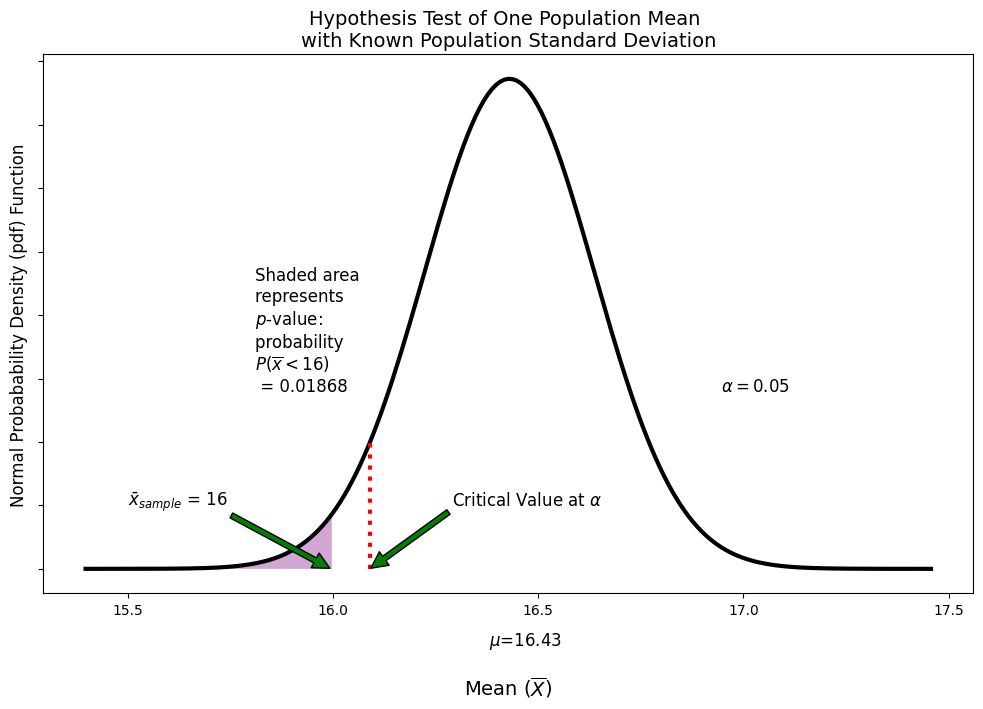

In [16]:
#@title Enter the values for the hypothesis test from your computation above
# @markdown Enter the sample mean $\bar{x}$
x_bar =  16 #@param {type:"number"}
# @markdown Enter the sample size $n$
n = 15 #@param {type:"integer"}
# @markdown Enter the population mean $\mu$ (The $H_0$ hypothesis)
mu =  16.43 #@param {type:"number"}
# @markdown Enter the <font color = "red">population </font> standard deviaton
population_std =  0.8 #@param {type:"number"}
# @markdown Enter the <font color = "red"> p value </font> from your hypothesis test with six decimal places)
p_value = 0.018683635713606015 #@param {type:"number"}
#@markdown Choose the probability distribution you used for this hypothesis testing
p_distribution = "Normal Distribution" # @param ["Normal Distribution", "Student's t Distribution", "Chi-Square Distribution","f Distribution", "None"]
#@markdown Choose the type of this hypothesis testing
Test_types = "Left-tailed hypothesis test" # @param ["Left-tailed hypothesis test", "Right-tailed hypothesis test", "Two-tailed hypothesis test","None"]
# @markdown Enter the statistically significant level
alpha = 0.05 #@param {type:"number"}


import numpy as np
import matplotlib.pyplot as plt
import scipy.stats  as stats
import sys # at top of file

std = population_std /np.sqrt(n)  # sample maen std

#Compute the probability
"""
p_value = 1 - stats.norm.cdf(x= x_bar, loc = mu, scale= std
                      )
"""

if ((p_value < 0.0186) or (p_value > 0.0187)):
    print("The p values was not accurate.")
    sys.exit()
elif (p_distribution != "Normal Distribution"):
    print("Reread the problem and chek the sample sizes to see what probability distribution you need to use.")
    sys.exit()
elif Test_types != "Left-tailed hypothesis test":
    print("The type of hypothesis does not agree with your hypothesis.")
    sys.exit()


# Set the plot area
ax = plt.rcParams["figure.figsize"] = (12, 7 )
x_lower = mu - 5 * std
x_upper = mu + 5 * std

#add the density curve ppf to the plot
x_pdf = np.arange(x_lower, x_upper,0.01) # array of input values for pdf
y_pdf = stats.norm.pdf(x_pdf, loc = mu, scale = std)
plt.plot(x_pdf, # array of inputs
         y_pdf,
         color='black', linewidth = 3 #, alpha=0.35
         )

# plot the area of left tailed test
plt.fill_between(x_pdf,
                 y_pdf , where = x_pdf < x_bar,
                 facecolor='purple', alpha=0.35
                 )

x_ct = stats.norm.ppf(alpha, loc=mu, scale=std)

y_ct = stats.norm.pdf(x_ct, loc = mu, scale = std)

plt.vlines(x_ct, 0, y_ct, colors="red",  linestyles='dotted', label = r'critical value at $\alpha$', linewidth = 3)

plt.annotate(r'Critical Value at $\alpha$', xy =(x_ct, 0),
                xytext =(x_ct + 0.2, 0.25),
                arrowprops = dict(facecolor ='green',
                shrink = 0.01), fontsize = 12)

plt.annotate(r'$\bar{x}_{sample}$' + f" = {x_bar}", xy =(x_bar - 0.005, 0),
                xytext =(x_bar - 0.5, 0.25),
                arrowprops = dict(facecolor ='green',
                shrink = 0.01), fontsize = 12)

y_label = -0.3
plt.text(fontsize = 12, x = mu - 0.05, y = y_label, s = r"$\mu$=" + str(mu))

y_text = 0.7
plt.text(
          fontsize = 12, x = mu -3 *std, y = y_text,
          s = "Shaded area \nrepresents \n$p$-value: \nprobability \n$P( \overline{x} < $" + str(x_bar) + ") \n = " + str(round(p_value, 5))
        )

plt.text(x = mu + 2.5 *std, y= y_text,fontsize=12, s =r'$\alpha = $' + str(alpha))
plt.xlabel(r"Mean $(\overline{X})$", fontsize = 14, )


ax = plt.subplot()
ax.set_yticklabels([])
ax.xaxis.set_label_coords(0.5, -0.15)

plt.ylabel(r"Normal Probabability Density (pdf) Function", fontsize = 12)
plt.title("Hypothesis Test of One Population Mean \nwith Known Population Standard Deviation", fontsize = 14)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## **$\color{green}{\textbf{TO DO 1:}}$ Computing Test Statistic Using `cdf` for a $\color{purple}{\text{left-tailed}}$ hypothesis test**

<details>
<summary><b>Show Problem </b></summary>

 It is believed that a stock price for a particular company will grow at a rate of $\$5$ per week with a standard deviation of $\$1$ per week. An investor believes the stock won’t grow as quickly. The mean and standard deviation of recorded changes in stock price in the last ten weeks is $\$4.3$ per week.  Perform a hypothesis test using a 5% level of significance.
</details>



### **1. Set up Hypotheses**

<b>"... at a rate of $\$5$ per week ... " </b> tells us that this hypothesis is of a single population mean test

* What are words like equal, not equal, greater,..

<b>"... It is believed that a stock price for a particular company will grow at a rate of  $\$5$  per week with a standard deviation of  $\$1$  per week ..." </b> tells us that

$H_{0}:$ <b> The null hypothesis: </b>. the mean stock price $\mu = \$5$ per week


<b>"... An investor believes the stock won’t grow as quickly.  ..." </b> tells us that

$H_{a}:$ <b> The alternative hypothesis: </b>. $\color{red}{\text{$\mu < 5$}}$ per week


### **2. Determine Distributions and Parameters**

"... with a <b>standard deviation of  $1  per week ..." </b> tells us that we know the population standard deviation, so we will use a normal distribution.

<b> Random variable: </b> $X =$ the mean stock price per week

$\overline{X} \sim N(\mu, \frac{\sigma_{x}}{\sqrt{n}})$

Since $\mu = \$5$ (from $H_{0}$ and <b> not</b> the data). $\sigma = \$1$ and sample size $n = 10.$

$\overline{X} \sim N(5, \frac{1}{\sqrt{10}})$

### **3. Compute test statistics (t or z)(traditional method): left-tailed test using tranditional method**


### **Syntax:**  `scipy.stats.`distribution`.cdf(x, df, loc= popmean, scale= sample_std)`

In [19]:
import numpy as np
import scipy.stats as stats

# Build the distribution model
mu = 5      # population mean, null hypothesis
sigma = 1     # population std
n = 10          # sample size
std_sample_mean = sigma / np.sqrt(n)
print(f"Population mean = ${mu:.2f}/week\nPopulation STD = ${sigma:.2f}/week\nSample mean STD = ${std_sample_mean:.2f}/week\nSample size = {n}")

# Value of random variable from the sample
x_bar = 4.3 # sample mean
# z_score for x_bar in order to look up the table for probability
z_score = (x_bar - mu) / std_sample_mean
print(f"The z_score for the sample mean random variable = {z_score:.3f}")

# z_score for the left tailed test with alpha = 0.05
# This is the equivalent of "5% level of significance"
alpha = 0.05
percentile = alpha # cdf is always the probability from -infinity to the value of the random variable
# What is the value of the random variable corresponding to the alpha (statistically significant level)
# critical value
z_alpha = stats.norm.ppf(percentile)
print(f"The z_alpha (critical value) for 0.05 left-tailed test is: {z_alpha:.3f}")

Population mean = $5.00/week
Population STD = $1.00/week
Sample mean STD = $0.32/week
Sample size = 10
The z_score for the sample mean random variable = -2.214
The z_alpha (critical value) for 0.05 left-tailed test is: -1.645


### **4. Calculate** $p$-value $= P( \overline{x} < \bar{x}_{\text{sample}})$

In [20]:
# Build the distribution model
mu = 5      # population mean, null hypothesis
sigma = 1     # population std
n = 10          # sample size
std_sample_mean = sigma / np.sqrt(n)
print(f"Population mean = ${mu:.2f}/week\nPopulation STD = ${sigma:.2f}/week\nSample mean STD = ${std_sample_mean:.2f}/week\nSample size = {n}")

# Value of random variable from the sample
x_bar = 4.3 # sample mean

alpha = 0.05

p_value = stats.norm.cdf(
    x_bar, # value of the random variable sample
    loc=mu,
    scale=std_sample_mean
)
print(f"The p-value for the significance level 0.05 with left-tailed test is {p_value}")

Population mean = $5.00/week
Population STD = $1.00/week
Sample mean STD = $0.32/week
Sample size = 10
The p-value for the significance level 0.05 with left-tailed test is 0.013428347753762187


### **5:  Make a Decision about $H_0$**

Since the p value is $0.013428 \lt \alpha = 0.05$, we reject the null hypothesis $H_0$

### **7: Write about any possible sources of error or other factors that could affect the results of our hypothesis test.**

There could be a number of factors that influence a stock price over the course of ten weeks
- Something disruptive in world events happens that impacts the stock price
- A competitor to the company releases a new product or service
- Someone important to the company resigns

### **8. Graphic Illustration of the distribution and $p$-value**
>> * #### **Hint 1:** If the inputs below you enter agree with the parameter variables used in creating the plot, you should see a plot with arrows pointing to the critical values at the statistically significant level $\alpha$ and test statistic, respectively.

>> * #### **Hint 2:** Use as many decimal places as possible.

>> * #### **Hint 3:** If you do not enter the correct p values or type of the hypothesis test, the App will output a message and exit.



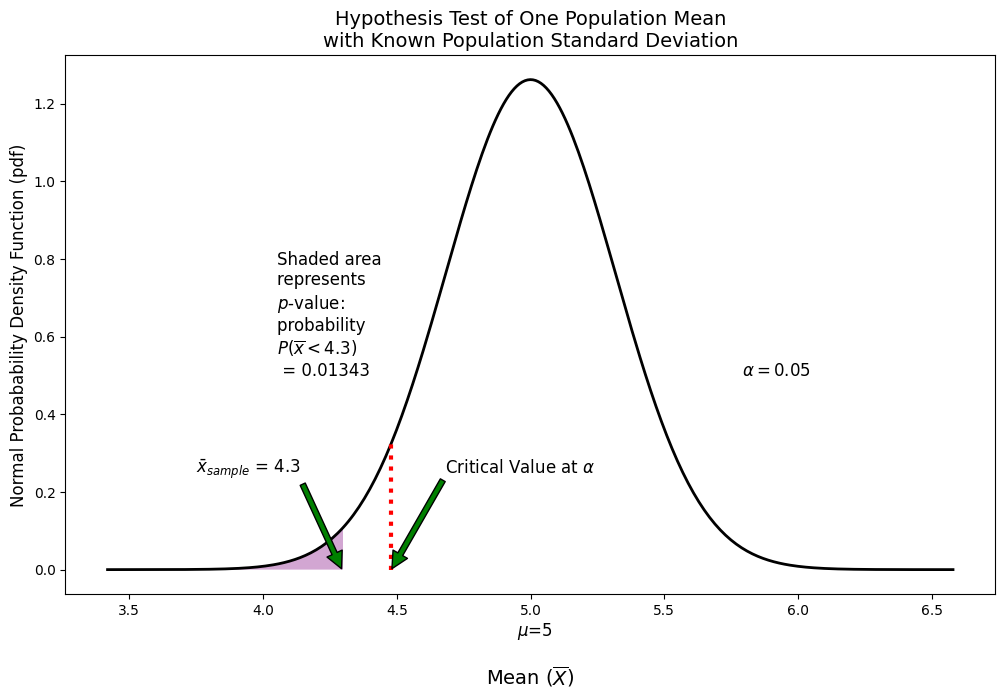

In [22]:
#@title Enter the values for the hypothesis test from your computation above
# @markdown Enter the sample mean $\bar{x}$
x_bar =  4.3#@param {type:"number"}
# @markdown Enter the sample size $n$
n = 10 #@param {type:"integer"}
# @markdown Enter the population mean $\mu$ (The $H_0$ hypothesis)
mu =  5 #@param {type:"number"}
# @markdown Enter the <font color = "red"><b>population </b></font> standard deviaton
population_std =  1 #@param {type:"number"}
# @markdown Enter the <font color = "red"> p value </font> from your hypothesis test with six decimal places)
p_value = 0.013428347753762187 #@param {type:"number"}
#@markdown Choose the probability distribution you used for this hypothesis testing
p_distribution = "Normal Distribution" # @param ["Normal Distribution", "Student's t Distribution", "Chi-Square Distribution","f Distribution", "None"]
#@markdown Choose the type of this hypothesis testing
Test_types = "Left-tailed hypothesis test" # @param ["Left-tailed hypothesis test", "Right-tailed hypothesis test", "Two-tailed hypothesis test","None"]
# @markdown Enter the statistically significant level
alpha = 0.05 #@param {type:"number"}

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats  as stats
import sys # at top of file


# Calculate Sample Standard Deviation
std = population_std /np.sqrt(n)            # standard deviation

#Compute the left-tailed probability
"""
p_value = stats.norm.cdf(x = x_bar, # cdf means the value of the random variable is < 16
                          loc = mu, # mean
                          scale = std # standard deviation
                          )
"""
if ((p_value < 0.0134) or (p_value > 0.01343)):
    print("The p values was not accurate, check the prameters you entered in STEP 4.")
    print("If you entered the accurate p value, a graph will show.")
    sys.exit()
elif Test_types != "Left-tailed hypothesis test":
    print("The type of hypothesis does not agree with your hypothesis.  Check the proporty of this probability distribution ")
    sys.exit()
elif (p_distribution != "Normal Distribution"):
    print("Reread the problem and chek the sample sizes to see what probability distribution you need to use.")
    sys.exit()


# Set the plot area
ax = plt.rcParams["figure.figsize"] = (12, 7 )
x_lower = mu - 5 * std
x_upper = mu + 5 * std

#add the density curve ppf to the plot
x_pdf = np.arange(x_lower, x_upper,0.01) # array of input values for pdf
y_pdf = stats.norm.pdf(x_pdf, loc = mu, scale = std)
plt.plot(x_pdf, # array of inputs
         y_pdf,
         color='black', linewidth = 2 #, alpha=0.35
         )

# plot the p value left tailed test
plt.fill_between(x_pdf,
                 y_pdf , where = x_pdf < x_bar,
                 facecolor='purple', alpha=0.35
                 )

x_ct = stats.norm.ppf(alpha, loc=mu, scale=std)

y_ct = stats.norm.pdf(x_ct, loc = mu, scale = std)

plt.vlines(x_ct, 0, y_ct, colors="red",  linestyles='dotted', label = r'critical value at $\alpha$', linewidth = 3)

plt.annotate(r'Critical Value at $\alpha$', xy =(x_ct, 0),
                xytext =(x_ct + 0.2, 0.25),
                arrowprops = dict(facecolor ='green',
                shrink = 0.01), fontsize = 12)

plt.annotate(r'$\bar{x}_{sample}$' + f" = {x_bar}", xy =(x_bar - 0.005, 0),
                xytext =(x_bar - 0.55, 0.25),
                arrowprops = dict(facecolor ='green',
                shrink = 0.01), fontsize = 12)

#Creating Display of values
y_label = -0.17
plt.text(fontsize = 12, x = mu - 0.05, y = y_label, s = r"$\mu$=" + str(mu))

y_text = 0.5

plt.text(
          fontsize = 12, x = mu -3 *std, y = y_text,
          s = "Shaded area \nrepresents \n$p$-value: \nprobability \n$P( \overline{x} < $" + str(x_bar) + ") \n = " + str(round(p_value, 5))
        )

plt.text(x = mu + 2.5 *std, y= y_text,fontsize=12, s =r'$\alpha = $' + str(alpha))

plt.xlabel(r"Mean $(\overline{X})$", fontsize = 14, )

ax = plt.subplot()
ax.xaxis.set_label_coords(0.5, -0.13)

plt.ylabel(r"Normal Probabability Density Function (pdf)", fontsize = 12)
#plt.ylabel(r"Student's t Probabability Density (pdf)", fontsize = 12, fontweight = "bold")
plt.title("Hypothesis Test of One Population Mean\nwith Known Population Standard Deviation", fontsize = 14)
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


## **Method 2: Using ``ttest`` with given raw data**


### **Syntax:** `scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative ='two-sided')`

<details>
  <summary><b>Show Specifications of Parameters</b></summary>

Calculate the T-test for the mean of ONE group of scores. For more infor click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html).

This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

**Parameters**

**a: array_like, Sample observation.**

**popmean:** float or array_like**
  Expected value in null hypothesis. If array_like, then it must have the same shape as a excluding the axis dimension.

**axis:** int or None, **optional**
  Axis along which to compute test; default is 0. If None, compute over the whole array a.

**nan_policy:** {‘propagate’, ‘raise’, ‘omit’}, **optional**
  Defines how to handle when input contains nan. The following options are available (default is ‘propagate’):
  **‘propagate’:** returns nan \
  **‘raise’:** throws an error\
  **‘omit’:** performs the calculations ignoring nan values

**alternative:** {‘two-sided’, ‘less’, ‘greater’}, **optional**
  Defines the alternative hypothesis. The following options are available (default is ‘two-sided’):\
  **‘two-sided’:** the means of the distributions underlying the samples are unequal.\
  **‘less’:** the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample.\
  **greater’:** the mean of the distribution underlying the first sample is greater than the mean of the distribution underlying the second sample.

**Returns** t-statistic and the p-value.
</details>

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
##  **🔖 $\color{blue}{\textbf{Lab Work 2: }}$Computing Test Statistic and $p$ Value for a $\color{purple}{\text{right-tailed}}$ hypothesis test**

<details>
  <summary><b> Show the problem </b></summary>

Statistics students believe that the mean score on the first statistics test is 65. A statistics instructor thinks the mean score is higher than 65. He samples ten statistics students and obtains the scores 65 65 70 67 66 63 63 68 72 71. He performs a hypothesis test using a 1% level of significance. The data are
assumed to be from a normal distribution.

</details>

### **1. Set up Hypotheses**

<details>
<b> Step 1: </b> Set up Hypotheses

* Mark keywords related to the hypotheses.

* Determine if it's about a mean or a proportion.

The words "mean score" tell us that the situation is about the mean of a single population.

Thus, this hypothesis testing will use a single population mean test with a preset 5% level of significance.

* What do the words such as equal, not equal, greater,... tell us?

"the $\color{red}{\text{mean score}}$ on the first statistics test $\color{red}{\text{is 65}}$ " <b>  </b>tells us that

$H_{0}:$</b> $\color{red}{\mu {\text{ = 65}}}$,

"instructor thinks <b> $\color{red}{\text{the mean score is higher than 65}}$" </b> tells us that

$H_{a}:$ <b> $\color{red}{\text{$\mu > 65$}}$ </b>

This is a right tailed test.
</details>


### **2. Determine Distributions and Parameters**

<details>
<b> Step 2: </b> Determine the distribution

<b>"The data are assumed to be from a normal distribution" </b> and there "no population standard deviation given" tells us that the distribution for the test is the Student's $t$-distribution.

<b> Random variable: </b> $X =$ average scores on the statistics test

$t \sim t_{df}$ where $df$ is the degree of freedom. With sample size = 10, we have $df$ = 9.


</details>

### **3. Calculate test statistic and p value for one sample Using `scipy.stats.` library**
Since this is a right-tailed test,
$p$-value = $P(\overline{x} > 67)$ (from computation below)

In [26]:
# manual work as in a traditional stats class
import statistics

import numpy as np
import scipy.stats as stats

scores = [65, 65, 70, 67, 66, 63, 63, 68, 72, 71]
x_bar = np.mean(scores)
std_sample = statistics.stdev(scores)
n = len(scores)
std_sample_mean = std_sample / np.sqrt(n)
print(f"Sample mean = {x_bar}\nSample STD = {std_sample}\nSample mean STD = {std_sample_mean}\nSample size = {n}")

Sample mean = 67.0
Sample STD = 3.197221015541813
Sample mean STD = 1.0110500592068734
Sample size = 10


In [31]:
# Calculate the critical value and test statistic
mu = 65 # From the null hypothesis
# t-score: distance of the sample mean from the population mean
t_score = (x_bar - mu) / std_sample_mean
print(f"The t score for the sample mean random variable is {t_score:.3f}")
# critical value for a right tailed test with alpha = 0.05
alpha = 0.01
df = n - 1 # degree of freedom
percentile = 1 - alpha # right tailed
t_crit = stats.t.ppf(percentile, df) # loc = 0 and std = 1 (standard t (normal distribution))
print(f"The t critical value for alpha = {alpha} is {t_crit:.3f}")

The t score for the sample mean random variable is 1.978
The t critical value for alpha = 0.01 is 2.821


In [35]:
import statistics

import numpy as np
import scipy.stats as stats

scores = [65, 65, 70, 67, 66, 63, 63, 68, 72, 71]
x_bar = np.mean(scores)
std_sample = statistics.stdev(scores)
n = len(scores)
std_sample_mean = std_sample / np.sqrt(n)
print(f"Sample mean = {x_bar}\nSample STD = {std_sample}\nSample mean STD = {std_sample_mean}\nSample size = {n}")

alpha = 0.01
df = n - 1 # degree of freedom
mu = 65 # null hypothesis

p_value = 1 - stats.t.cdf( # right-tailed test
    x_bar, # value of the random variable sample
    df=df,
    loc=mu,
    scale=std_sample_mean
)
print(f"The p-value for the significance level {alpha} with right-tailed test is {p_value}")

Sample mean = 67.0
Sample STD = 3.197221015541813
Sample mean STD = 1.0110500592068734
Sample size = 10
The p-value for the significance level 0.01 with right-tailed test is 0.03964824393588806


### **Syntax:** `scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative ='two-sided')`

<details>
  <summary><b>Show Specifications of Parameters</b></summary>

Calculate the T-test for the mean of ONE group of scores. For more infor click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html).

This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

**Parameters**

**a: array_like, Sample observation.**

**popmean:** float or array_like**
  Expected value in null hypothesis. If array_like, then it must have the same shape as a excluding the axis dimension.

**axis:** int or None, **optional**
  Axis along which to compute test; default is 0. If None, compute over the whole array a.

**nan_policy:** {‘propagate’, ‘raise’, ‘omit’}, **optional**
  Defines how to handle when input contains nan. The following options are available (default is ‘propagate’):
  **‘propagate’:** returns nan \
  **‘raise’:** throws an error\
  **‘omit’:** performs the calculations ignoring nan values

**alternative:** {‘two-sided’, ‘less’, ‘greater’}, **optional**
  Defines the alternative hypothesis. The following options are available (default is ‘two-sided’):\
  **‘two-sided’:** the means of the distributions underlying the samples are unequal.\
  **‘less’:** the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample.\
  **greater’:** the mean of the distribution underlying the first sample is greater than the mean of the distribution underlying the second sample.

**Returns** t-statistic and the p-value.
</details>

In [37]:
import scipy.stats as stats

scores = [65, 65, 70, 67, 66, 63, 63, 68, 72, 71]

t_stat, p_value = stats.ttest_1samp(
    scores,
    mu,
    axis=0,
    alternative="greater" # corresponds to a right-tail test
)
print(f"The t statistic (t-score) = {t_stat:.2f}\nThe p value = {p_value}.")

The t statistic (t-score) = 1.98
The p value = 0.03964824393588805.


### **4:  Make a Decision about $H_0$**

Since the p-value is $0.03964 \gt \alpha = 0.01$, we fail to reject the null hypothesis $H_0$

### **5. Write a conclusion about the hypothesis test**

There is insufficient evidence to support the instructor's claim that the mean test score is more than 65 at the 0.01 significance level.

### **6: Write about any possible sources of error or other factors that could affect the results of our hypothesis test.**

### **7. Graph the Distribution and $p$-value for a right-tailed test**
>> * #### **Hint 1:** If the inputs below you enter agree with the parameter variables used in creating the plot, you should see a plot with arrows pointing to the critical values at the statistically significant level $\alpha$ and test statistic, respectively.

>> * #### **Hint 2:** Use as many decimal places as possible.

>> * #### **Hint 3:** If you do not enter the correct p values or type of the hypothesis test, the App will output a message and exit.


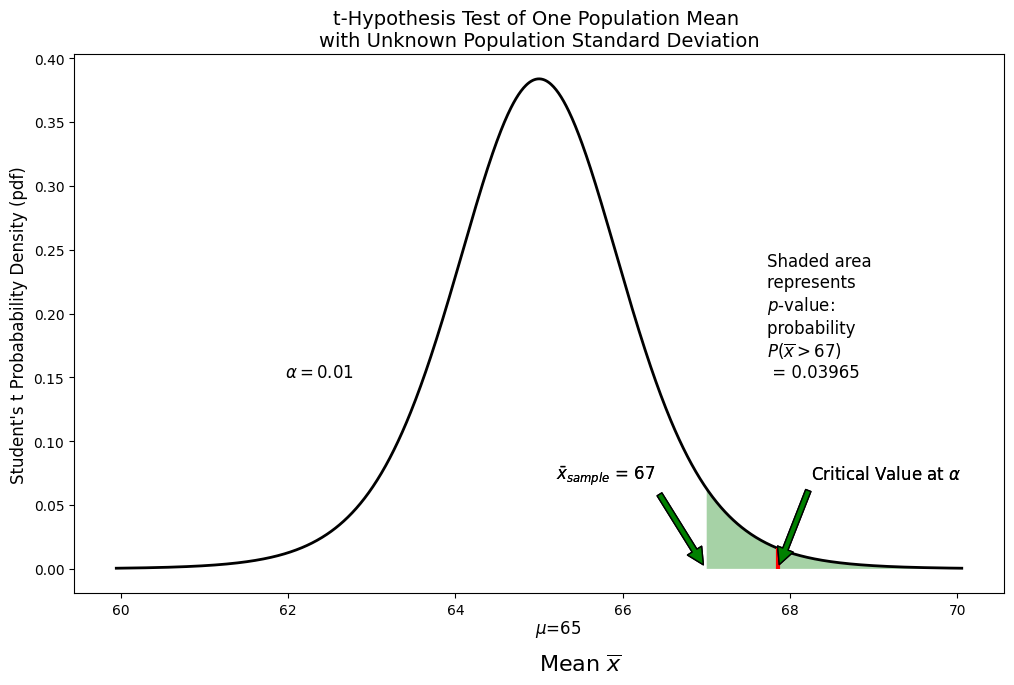

In [40]:
#@title Enter the values for the hypothesis test from your computation above
# @markdown Enter the sample mean $\bar{x}$
x_bar =  67 #@param {type:"number"}
# @markdown Enter the sample size $n$
n = 10 #@param {type:"integer"}
# @markdown Enter the population mean $\mu$ (The $H_0$ hypothesis)
mu =  65 #@param {type:"number"}
# @markdown Enter the <font color = "red"><b>sample </b></font> standard deviaton (with 4 decimal places)
sample_std=  3.197221015541813 #@param {type:"number"}
# @markdown Enter the <font color = "red"> p value </font> from your hypothesis test with six decimal places)
p_value = 0.03964824393588805 #@param {type:"number"}
#@markdown Choose the probability distribution you used for this hypothesis testing
p_distribution = "Student's t Distribution" # @param ["Normal Distribution", "Student's t Distribution", "Chi-Square Distribution","f Distribution", "None"]
#@markdown Enter the degree of freedom
df = 9  #@param {type:"integer"}
#@markdown Choose the type of this hypothesis testing
Test_types = "Right-tailed hypothesis test" # @param ["Left-tailed hypothesis test", "Right-tailed hypothesis test", "Two-tailed hypothesis test","None"]
# @markdown Enter the statistically significant level
alpha = 0.01 #@param {type:"number"}


import numpy as np
import matplotlib.pyplot as plt
import scipy.stats  as stats
import sys # at top of file


# Calculate Sample mean Standard Deviation
std = sample_std /np.sqrt(n)         # standard deviation
df = n - 1
#Compute the right-tailed probability
"""
p_value = 1 - stats.t.cdf(x = x_bar, # cdf means the value of the random variable is < 16
                          df = df,
                          loc = mu, # mean
                          scale = std # standard deviation
                          )
"""
if ((p_value < 0.039) or (p_value > 0.0397)):
    print("The p values was not accurate. Use more decimal places if you think that you used the correct parameters in your calculation.")
elif (p_distribution != "Student's t Distribution"):
    print("Reread the problem and chek the sample sizes to see what probability distribution you need to use.")
    sys.exit()
elif df != 9:
    print("The degree of freedom is not correct.")
    sys.exit()
elif Test_types != "Right-tailed hypothesis test":
    print("The type of hypothesis does not agree with the hypothesis. ")
    sys.exit()


# Set the plot area
ax = plt.rcParams["figure.figsize"] = (12, 7 )
x_lower = mu - 5 * std
x_upper = mu + 5 * std

#add the density curve ppf to the plot
x_pdf = np.arange(x_lower, x_upper,0.01) # array of input values for pdf
y_pdf = stats.t.pdf(x_pdf, df = df, loc = mu, scale = std)
plt.plot(x_pdf, # array of inputs
         y_pdf,
         color='black', linewidth = 2 #, alpha=0.35
         )

# plot p value of right tail

plt.fill_between(x_pdf,
                 y_pdf , where = x_pdf > x_bar,
                 facecolor='green', alpha=0.35
                 )


x_ct = stats.t.ppf( 1 - alpha, df, loc=mu, scale=std)

y_ct = stats.t.pdf(x_ct, df, loc = mu, scale = std)

plt.vlines(x_ct, 0, y_ct, colors="red",  linestyles='solid', label = r'critical value at $\alpha$', linewidth = 3)

plt.annotate(r'Critical Value at $\alpha$', xy =(x_ct, 0),
                xytext =(x_ct + 0.4, 0.07),
                arrowprops = dict(facecolor ='green',
                shrink = 0.05), fontsize = 12)

plt.annotate(r'$\bar{x}_{sample}$' + f" = {x_bar}", xy =(x_bar - 0.005, 0),
                xytext =(x_bar - 1.8, 0.07),
                arrowprops = dict(facecolor ='green',
                shrink = 0.05), fontsize = 12)

y_label = -0.05
plt.text(x = mu - 0.05, y = y_label, s = r"$\mu$=" + str(mu), fontsize = 12)
plt.text(x = mu, y = y_label - 0.03, s = r"Mean $\overline{x}$", fontsize = 16)

#show p values and alpha
x_text = mu -3 *std
y_text = 0.15

plt.annotate(r'Critical Value at $\alpha$', xy =(x_ct, 0),
                xytext =(x_ct + 0.4, 0.07),
                arrowprops = dict(facecolor ='green',
                shrink = 0.05), fontsize = 12)

plt.annotate(r'$\bar{x}_{sample}$' + f" = {x_bar}", xy =(x_bar - 0.005, 0),
                xytext =(x_bar - 1.8, 0.07),
                arrowprops = dict(facecolor ='green',
                shrink = 0.05), fontsize = 12)

plt.text(
          x = mu + 2.7 *std, y = y_text, fontsize = 12,
          s = "Shaded area \nrepresents \n$p$-value: \nprobability \n$P( \overline{x} > $" + str(x_bar) + ") \n = " + str(round(p_value, 5))
        )

plt.text(x = mu - 3 *std, y= y_text,fontsize=12, s =r'$\alpha = $' + str(alpha))

plt.ylabel(r"Student's t Probabability Density (pdf)", fontsize = 12)
plt.title("t-Hypothesis Test of One Population Mean \nwith Unknown Population Standard Deviation", fontsize = 14)
plt.show()

### **9.** What are significant differences of the two hypothesis tests used in Labwork 1 and Labwork 2.



1. We used different probability distributions (Student's t vs Normal)
2. We used different types of test (left-tailed vs right-tailed)
3. In lab work 2, we used the actual data values, while in lab work 1, we were given the sample mean.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## **$\color{green}{\textbf{ TO DO 2: }}$ Using ``ttest`` with given raw data for a $\color{purple}{\text{right-tailed}}$ hypothesis test**

<details>
  <summary><b> Show the problem </b></summary>

The National Institute of Standards and Technology provides exact data on the conductivity properties of materials. The following are conductivity measurements for 11 randomly selected pieces of a particular type of glass.
1.11; 1.07; 1.11; 1.07; 1.12; 1.08; .98; .98; 1.02; .95; .95
Is there convincing evidence that the average conductivity of this type of glass is greater than one? Use a significance level of 0.05. Assume the population is normal.

</details>

### **1. Set up Hypothesis**

"Is there convincing evidence that the average conductivity of this type of glass is greater than one?" This tells us that our null hypothesis is that the average conductivity is one and the alternative hypothesis is that the average conductivity is greater than one.

$H_0$: average conductivity = 1


$H_a$: average conductivity > 1

This is a right tailed test

### **2. Determine Distributions and Paramters**

"Assume the population is normal" and there is no population standard deviation given tells us that the distribution for the test is the Student's $t$-distribution.

Random variable: $X =$ conductivity of a randomly selected piece of glass

$t \sim t_{df}$ where $df$ is the degree of freedom. With sample size = 11, we have $df$ = 10.

### **3. Calculate test statistic and p value for one sample Using Python code using `scipy.stats` library**

### **Syntax:** `scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative ='two-sided')`

<details>
  <summary><b>Show Specifications of Parameters</b></summary>

Calculate the T-test for the mean of ONE group of scores. For more infor click [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html).

This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

**Parameters**

**a: array_like, Sample observation.**

**popmean:** float or array_like**
  Expected value in null hypothesis. If array_like, then it must have the same shape as a excluding the axis dimension.

**axis:** int or None, **optional**
  Axis along which to compute test; default is 0. If None, compute over the whole array a.

**nan_policy:** {‘propagate’, ‘raise’, ‘omit’}, **optional**
  Defines how to handle when input contains nan. The following options are available (default is ‘propagate’):
  **‘propagate’:** returns nan \
  **‘raise’:** throws an error\
  **‘omit’:** performs the calculations ignoring nan values

**alternative:** {‘two-sided’, ‘less’, ‘greater’}, **optional**
  Defines the alternative hypothesis. The following options are available (default is ‘two-sided’):\
  **‘two-sided’:** the means of the distributions underlying the samples are unequal.\
  **‘less’:** the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample.\
  **greater’:** the mean of the distribution underlying the first sample is greater than the mean of the distribution underlying the second sample.

**Returns** t-statistic and the p-value.
</details>

In [44]:
import scipy.stats as stats

conductivity = [1.11, 1.07, 1.11, 1.07, 1.12, 1.08, 0.98, 0.98, 1.02, 0.95, 0.95]

x_bar = np.mean(conductivity)
std_sample = statistics.stdev(conductivity)
n = len(conductivity)
std_sample_mean = std_sample / np.sqrt(n)
print(f"Sample mean = {x_bar}\nSample STD = {std_sample}\nSample mean STD = {std_sample_mean}\nSample size = {n}")

mu = 1

t_stat, p_value = stats.ttest_1samp(
    conductivity,
    mu,
    axis=0,
    alternative="greater" # corresponds to a right-tail test
)
print(f"The t statistic (t-score) = {t_stat:.2f}\nThe p value = {p_value}.")

Sample mean = 1.0399999999999998
Sample STD = 0.06587867636800247
Sample mean STD = 0.019863168290719768
Sample size = 11
The t statistic (t-score) = 2.01
The p value = 0.03586064860607561.


### **4:  Make a Decision about $H_0$**

Since the p-value is $0.0358606 \lt \alpha = 0.05$, we reject the null hypothesis $H_0$

### **5. Write a conclusion about the hypothesis test**

There is sufficient evidence to support the hypothesis that the average conductivity of this type of glass is more than 1 at the 0.05 significance level.

### **6: Write about any possible sources of error or other factors that could affect the results of our hypothesis test.**

1. There could be errors in the measurement of the conductivity of the glass
2. The samples of glass may not actually be representative of the overall population

### **7. Graph the $p$-value for a right-tailed test.**
>> * #### **Hint 1:** If the inputs below you enter agree with the parameter variables used in creating the plot, you should see a plot with arrows pointing to the critical values at the statistically significant level $\alpha$ and test statistic, respectively.

>> * #### **Hint 2:** Use as many decimal places as possible.
>> * #### **Hint 3:** If you do not enter the correct p values or type of the hypothesis test, the App will output a message and exit.


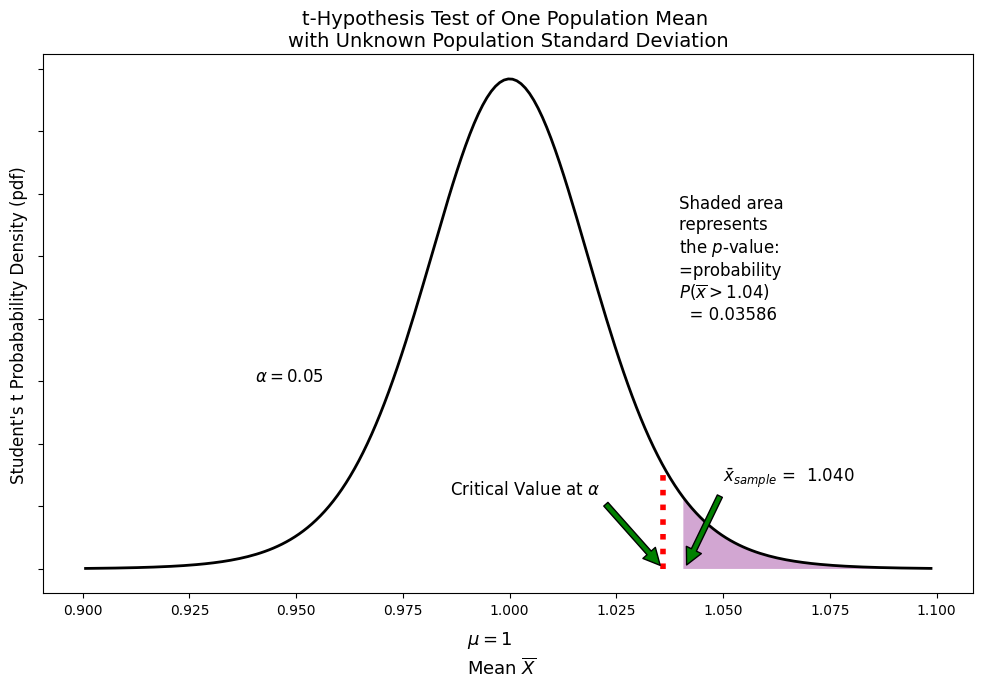

In [46]:
#@title Enter the values for the hypothesis test from your computation above
# @markdown Enter the sample mean $\bar{x}$
x_bar =  1.0399999999999998 #@param {type:"number"}
# @markdown Enter the sample size $n$
n = 11 #@param {type:"integer"}
# @markdown Enter the population mean $\mu$ (The $H_0$ hypothesis)
mu =  1 #@param {type:"number"}
# @markdown Enter the <font color = "red"><b>sample </b></font> standard deviaton (with 4 decimal places)
sample_std=  0.06587867636800247 #@param {type:"number"}
# @markdown Enter the <font color = "red"> p value </font> from your hypothesis test with six decimal places)
p_value = 0.03586064860607561 #@param {type:"number"}
#@markdown Choose the probability distribution you used for this hypothesis testing
p_distribution = "Student's t Distribution" # @param ["Normal Distribution", "Student's t Distribution", "Chi-Square Distribution","f Distribution", "None"]
#@markdown Enter the degree of freedom
df = 10  #@param {type:"integer"}
#@markdown Choose the type of this hypothesis testing
Test_types = "Right-tailed hypothesis test" # @param ["Left-tailed hypothesis test", "Right-tailed hypothesis test", "Two-tailed hypothesis test","None"]
# @markdown Enter the statistically significant level
alpha = 0.05 #@param {type:"number"}
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats  as stats
import statistics
import sys # at top of file

# Calculate Sample mean Standard Deviation
std = sample_std /np.sqrt(n)         # standard deviation
df = n - 1
#Compute the right probability
"""
p_value = 1 - stats.t.cdf(x = x_bar, # cdf means the value of the random variable is < 16
                          df = df,
                          loc = mu, # mean
                          scale = std # standard deviation
                          )
"""
if ((p_value < 0.035) or (p_value > 0.0359)):
    print("The p values was not accurate, Use more decimal places if you think that you used the correct parameters in your calculation,")
    sys.exit()
elif (p_distribution != "Student's t Distribution"):
    print("Reread the problem and chek the sample sizes to see what probability distribution you need to use.")
    sys.exit()
elif df != 10:
    print("The degree of freedom is not correct.")
    sys.exit()
elif Test_types != "Right-tailed hypothesis test":
    print("The type of hypothesis does not agree with your hypothesis.  Check the proporty of this probability distribution ")
    sys.exit()

plt.figure(figsize = (12, 7 ))
x_lower = mu - 5 * std
x_upper = mu + 5 * std

#add the density curve ppf to the plot
x_pdf = np.arange(x_lower, x_upper,0.001) # array of input values for pdf
y_pdf = stats.t.pdf(x_pdf, df = df, loc = mu, scale = std)
plt.plot(x_pdf, # array of inputs
         y_pdf,
         color='black', linewidth = 2 #, alpha=0.35
         )
# fill in the right tail for p value
plt.fill_between(x_pdf,
                 y_pdf , where = x_pdf > x_bar,
                 facecolor='purple', alpha=0.35
                 )
# compute the critical value for right tail test
x_ct = stats.t.ppf(1 - alpha, df = df, loc=mu, scale=std)

y_max = stats.t.pdf(x_ct, df= df, loc = mu, scale = std)

plt.vlines(x_ct, 0, y_max, colors="red", linestyles='dotted', label='critical point', linewidth = 4)

plt.annotate(r'Critical Value at $\alpha$', xy =(x_ct, 0),
                xytext =(x_ct - 0.05, 3),
                arrowprops = dict(facecolor ='green',
                shrink = 0.05), fontsize = 12)

plt.annotate(r'$\bar{x}_{sample}$' + f" = {x_bar: .3f}", xy =(x_bar + 0.001, 0),
                xytext =(x_bar + 0.01, 3.5),
                arrowprops = dict(facecolor ='green',
                shrink = 0.05), fontsize = 12)

y_label = -3.0
plt.text(fontsize=13, x = mu - 0.01, y= y_label, s= r"$\mu = $" + f"{mu}")
plt.text(fontsize=13, x = mu - 0.01, y= y_label - 1.2, s= r"Mean $\overline{X}$")

plt.text(x = mu - 3 * std, y= 7.5,fontsize=12, s =r'$\alpha = $' + str(alpha))

y_text = 10
plt.text(mu + 2 * std, y_text, fontsize=12,
         s = "Shaded area\nrepresents \nthe $p$-value:\n=probability \n$P( \overline{x} > $" + str(round(x_bar, 2)) + ") \n  = " + str(round(p_value, 5)))

ax = plt.gca()
ax.set_yticklabels([])
plt.ylabel(r"Student's t Probabability Density (pdf)", fontsize = 12)
plt.title("t-Hypothesis Test of One Population Mean \nwith Unknown Population Standard Deviation", fontsize = 14)
plt.show()